**Data Cleaning and Preprocessing**

In [2]:
import numpy as np
import pandas as pd
from statistics import variance
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score
import xgboost as xgb
# from mlxtend.classifier import StackingClassifier
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv('Train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#filling null values in gender with mode as it is a categorical data
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [7]:
#filling null values in married with mode as it is a categorical data
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [8]:
#filling null values in Dependents with mode as it is a categorical data
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [9]:
#filling null values in Self_Employed with mode as it is a categorical data
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [10]:
#filling null values in LoanAmount with mean as it is a numerical data
df['LoanAmount'].fillna(df['LoanAmount'].mean(),inplace=True)
print(variance(df['LoanAmount']))
df

7062.295974604294


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [11]:
# As variance is very high for loan amount we normalize it by taking log of the amount
# df['LoanAmount_log']=np.log(df['LoanAmount'])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [12]:
#filling null values in Loan_Amount_term with mode as it is a categorical data
print(df['Loan_Amount_Term'].mode()[0])
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

360.0


In [13]:
#filling null values in Credit_History with mode as it is a categorical data
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
print(df.isnull().sum())
df

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [14]:
df['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
# df['TotalIncome_Log']=np.log(df['TotalIncome'])
# print(variance(df['TotalIncome_Log']))
# print(df['TotalIncome'].hist(bins=20))
# print(df['TotalIncome_Log'].hist(bins=20))

Gender
Male      502
Female    112
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

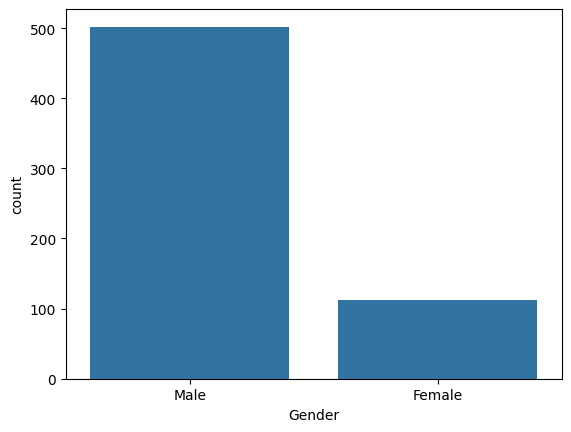

In [15]:
print(df['Gender'].value_counts())
sns.countplot(x='Gender',data=df)

Married
Yes    401
No     213
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

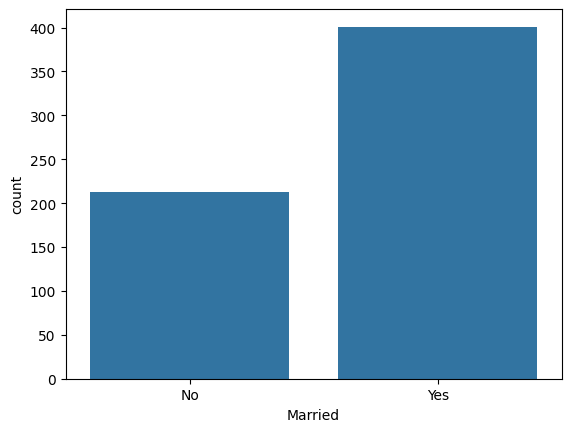

In [16]:
print(df['Married'].value_counts())
sns.countplot(x='Married',data=df)

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

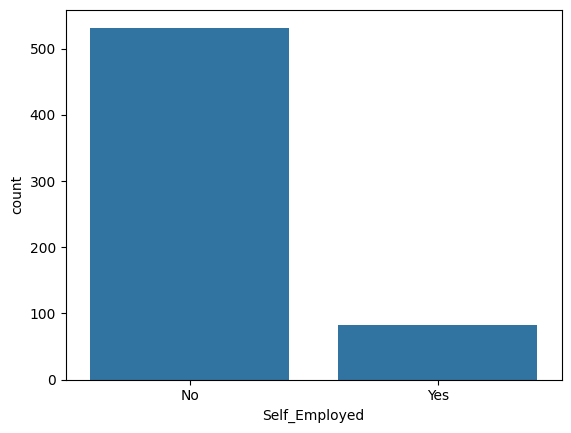

In [17]:
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed',data=df)

Credit_History
1.0    525
0.0     89
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

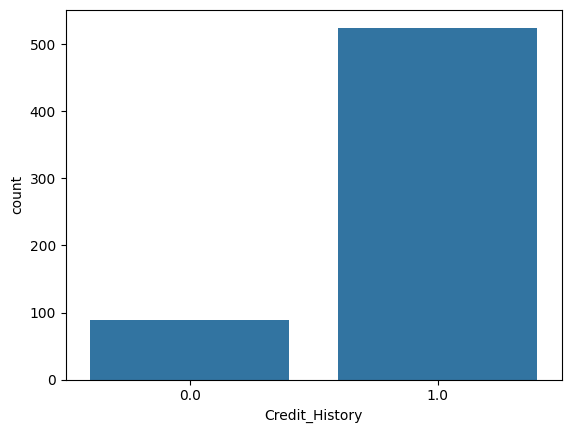

In [18]:
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History',data=df)

LoanAmount
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: count, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

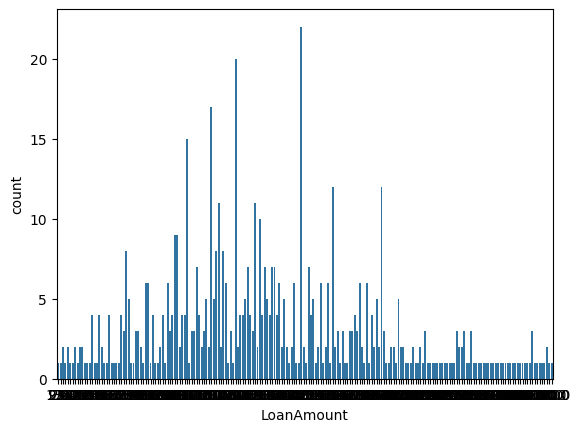

In [19]:
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount',data=df)

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

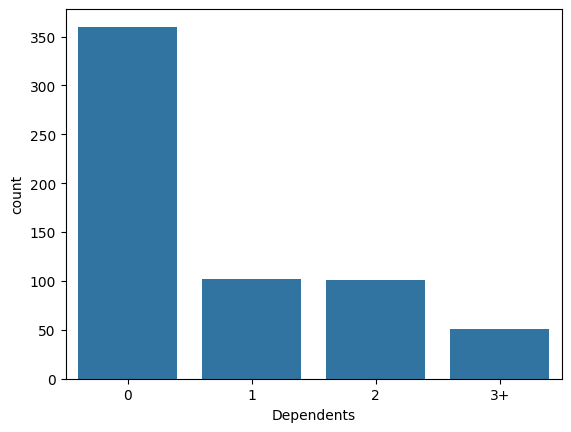

In [20]:
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents',data=df)

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,7583.0


**Label Encoding**

In [22]:
for feat in df:
  le=LabelEncoder()
  if df[feat].dtype=='object':
    df[feat]=le.fit_transform(df[feat])

In [23]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1,5849.0
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0,6091.0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1,3000.0
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1,4941.0
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1,2900.0
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1,4106.0
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1,8312.0
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1,7583.0


In [24]:
# x = df.iloc[:,np.r_[1:5,9:11,13]].values #independent variables
# y = df.iloc[:,12].values # dependent variables
# print(x)
# print(x[4])
# print(type(x))
y=df['Loan_Status'].values
# y
x=df.drop(labels=['Loan_Status','ApplicantIncome','CoapplicantIncome'],axis=1).values
x

array([[0.000e+00, 1.000e+00, 0.000e+00, ..., 1.000e+00, 2.000e+00,
        5.849e+03],
       [1.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        6.091e+03],
       [2.000e+00, 1.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        3.000e+03],
       ...,
       [6.110e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        8.312e+03],
       [6.120e+02, 1.000e+00, 1.000e+00, ..., 1.000e+00, 2.000e+00,
        7.583e+03],
       [6.130e+02, 0.000e+00, 0.000e+00, ..., 0.000e+00, 1.000e+00,
        4.583e+03]])

In [25]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [26]:
Labelencoder_x = LabelEncoder()
Labelencoder_y = LabelEncoder()

In [27]:
for i in range(4) :
    x[:, i] = Labelencoder_x.fit_transform(x[:,i])
# x[:,3]=Labelencoder_x.fit_transform(x[:,3])
x[:, 6] = Labelencoder_x.fit_transform(x[:,6])
y=Labelencoder_y.fit_transform(y)
print(x[:491,5])
print(x)
print(y)

[0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0.

**SPLITTING THE DATASET**

In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
x_train.shape

(491, 11)

In [29]:
from statistics import variance
ls=x_train[:,4].tolist()
ls1=x_train[:,6].tolist()
print(x_train[4])
y

[2.660e+02 1.000e+00 1.000e+00 2.000e+00 0.000e+00 0.000e+00 1.030e+02
 3.600e+02 1.000e+00 1.000e+00 6.095e+03]


array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [30]:
y_train=Labelencoder_y.fit_transform(y_train)
y_test=Labelencoder_y.fit_transform(y_test)
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [31]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train[:,4:7]=ss.fit_transform(x_train[:,4:7])
# x_train[:,7]=ss.fit_transform(x_train[:,7])
x_test[:,4:7]=ss.fit_transform(x_test[:,4:7])
# x_test[:,7]=ss.fit_transform(x_test[:,7])
x_train[:, 5] = x[:x_train.shape[0],5]
print(x_train)
ls=[]
x=[]

[[9.000e+01 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 5.858e+03]
 [5.330e+02 1.000e+00 0.000e+00 ... 1.000e+00 1.000e+00 1.125e+04]
 [4.520e+02 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 5.681e+03]
 ...
 [3.590e+02 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 8.334e+03]
 [1.920e+02 1.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 6.033e+03]
 [5.590e+02 0.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 6.486e+03]]


**DECISION TREE CLASSIFIER**

In [32]:
dt_clf=DecisionTreeClassifier()
my_model = xgb.XGBClassifier()
my_model.fit(x_train, y_train)
print(x_train)
print(y_train)
k=5
# dt_scores = cross_val_score(dt_clf, x_train, y_train, cv=k)
xgb_scores = cross_val_score(my_model, x_train, y_train, cv=k)
# Predicting the Test set results
y_pred1 = my_model.predict(x_train)
dt_clf.fit(x_train, y_train) #y is type of object that sklearn cannot recognize so convert it into int

[[9.000e+01 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 5.858e+03]
 [5.330e+02 1.000e+00 0.000e+00 ... 1.000e+00 1.000e+00 1.125e+04]
 [4.520e+02 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 5.681e+03]
 ...
 [3.590e+02 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 8.334e+03]
 [1.920e+02 1.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 6.033e+03]
 [5.590e+02 0.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 6.486e+03]]
[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 

DecisionTreeClassifier()

**XGBOOST**

In [33]:


# Split the data into training and testing sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Create your models
dt_clf = DecisionTreeClassifier()
xgb_clf = xgb.XGBClassifier()
print(x_train)
print(y_train)
# Perform k-fold cross-validation on both models
k = 5  # You can change k to the desired number of folds
dt_scores = cross_val_score(dt_clf, x_train, y_train, cv=k)
xgb_scores = cross_val_score(xgb_clf, x_train, y_train, cv=k)

# Print the cross-validation scores for both models
print("Decision Tree Classifier Cross-Validation Scores:")
print(dt_scores)
print("Mean Score:", dt_scores.mean())

print("\nXGBoost Classifier Cross-Validation Scores:")
print(xgb_scores)
print("Mean Score:", xgb_scores.mean())

# Fit the models on the full training data (optional)
dt_clf.fit(x_train, y_train.astype('int'))
xgb_clf.fit(x_train, y_train)


[[9.000e+01 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 5.858e+03]
 [5.330e+02 1.000e+00 0.000e+00 ... 1.000e+00 1.000e+00 1.125e+04]
 [4.520e+02 1.000e+00 1.000e+00 ... 0.000e+00 0.000e+00 5.681e+03]
 ...
 [3.590e+02 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 8.334e+03]
 [1.920e+02 1.000e+00 1.000e+00 ... 1.000e+00 2.000e+00 6.033e+03]
 [5.590e+02 0.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 6.486e+03]]
[1 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 1
 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 0
 1 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1
 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The accuracy of Decision Tree Classifier is:  0.8211382113821138
[[18  7]
 [15 83]]


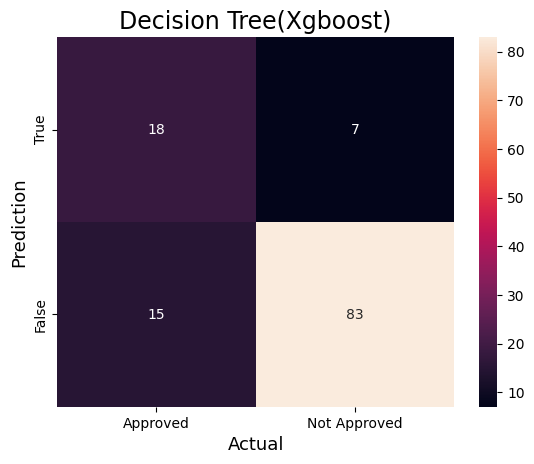

In [34]:
y_pred=xgb_clf.predict(x_test)
print("The accuracy of Decision Tree Classifier is: ",metrics.accuracy_score(y_pred,y_test))
x.append('Decision Tree')
ls.append(metrics.accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Decision Tree(Xgboost)',fontsize=17)
plt.show()

**RANDOM FOREST CLASSIFIER**

In [35]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

Accuracy of Random Forest Classifier is 0.8373983739837398
[[16  3]
 [17 87]]


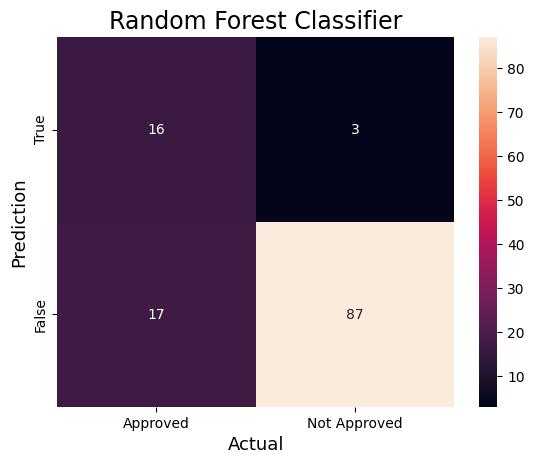

In [36]:
y_pred = rf_clf.predict(x_test)
print("Accuracy of Random Forest Classifier is", metrics.accuracy_score(y_pred, y_test))
x.append('Random Forest')
ls.append(metrics.accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Random Forest Classifier',fontsize=17)
plt.show()

**KNN**

In [37]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train.astype('int'))

KNeighborsClassifier()

Accuracy of K Neighbors Classifier is 0.6016260162601627
[[ 1 17]
 [32 73]]


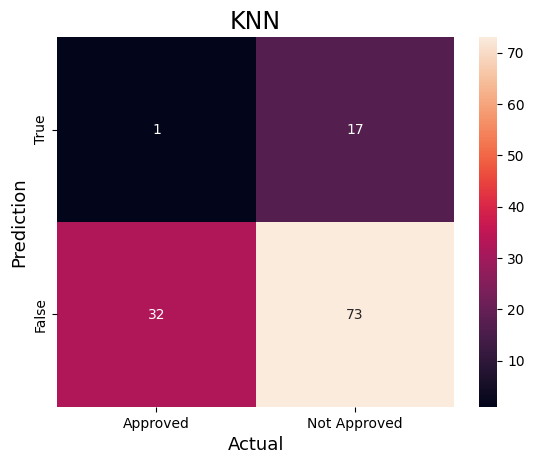

In [38]:
y_pred = kn_clf.predict(x_test)
print("Accuracy of K Neighbors Classifier is", metrics.accuracy_score(y_pred, y_test))
x.append('KNN')
ls.append(metrics.accuracy_score(y_pred,y_test))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('KNN',fontsize=17)
plt.show()

**SUPPORT VECTOR MACHINE**

In [39]:
svc=SVC(kernel='rbf',C=30,gamma='auto')
svc.fit(x_train,y_train.astype('int'))

SVC(C=30, gamma='auto')

Accuracy of Support Vector Classification is 0.7317073170731707
[[ 0  0]
 [33 90]]


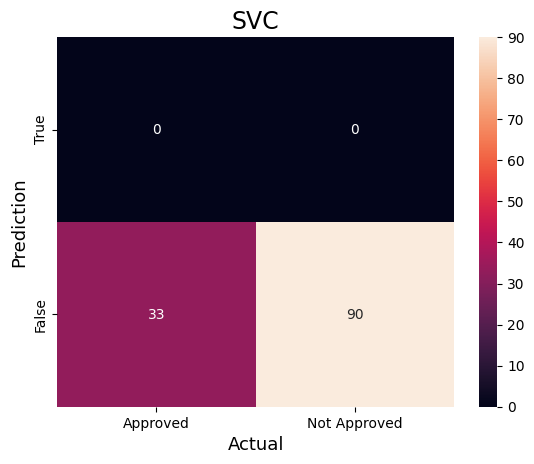

In [40]:
y_pred=svc.predict(x_test)
print("Accuracy of Support Vector Classification is", metrics.accuracy_score(y_pred, y_test))
x.append('SVC')
ls.append(metrics.accuracy_score(y_pred, y_test))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('SVC',fontsize=17)
plt.show()

**NAIVE BAYES**

In [41]:
nb_clf=GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [42]:
y_pred=nb_clf.predict(x_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [43]:
print("The accuracy of Naive Bayes Classifier is: ",metrics.accuracy_score(y_pred,y_test))
x.append('Naive Bayes')
ls.append(metrics.accuracy_score(y_pred, y_test))

The accuracy of Naive Bayes Classifier is:  0.7886178861788617


**Naive Bayes (Hyperparameter Tuning)**

0.4634146341463415
[[18 11]
 [15 79]]


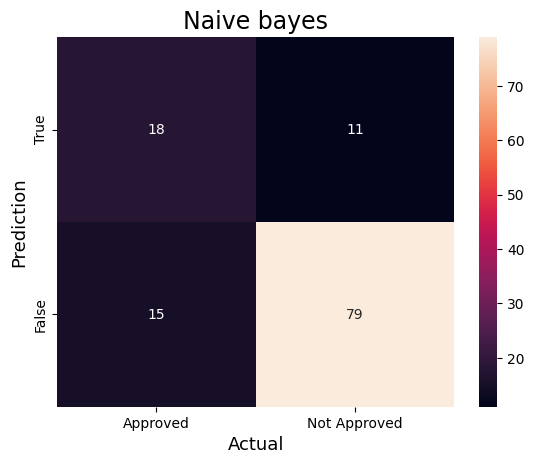

In [44]:
adb1 = AdaBoostClassifier(estimator = GaussianNB())
param1 ={'n_estimators':[150], 'learning_rate':[1.0]}
adb1_model = adb1.fit(x_train,y_train)
yp1=adb1_model.predict(x_test)
print(adb1_model.score(x_test,y_test))
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Naive bayes',fontsize=17)
plt.show()

In [45]:
nb_clf.class_prior_

array([0.32382892, 0.67617108])

In [46]:
nb_clf.epsilon_

0.047978187536275384

In [47]:
n_classes=nb_clf.var_.shape[0]
n_classes

2

In [48]:
params = {
            'priors': [None],
            'var_smoothing': [1e-9, 1e-10, 1e-8],
         }

nb_clf_grid = GridSearchCV(GaussianNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)
nb_clf_grid.fit(x_train,y_train)
print("The best hyperparameters are ",nb_clf_grid.best_params_)
# adb1.set_params(**nb_clf_grid.best_params_)

adb1.fit(x_train,y_train)
best_nb_clf_grid = nb_clf_grid.fit(x_train,y_train)
best_nb_clf_grid.best_estimator_
print(best_nb_clf_grid.score(x_train,y_train))
print(best_nb_clf_grid.score(x_test,y_test))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
The best hyperparameters are  {'priors': None, 'var_smoothing': 1e-09}
Fitting 5 folds for each of 3 candidates, totalling 15 fits
0.8004073319755601
0.7886178861788617


[[18 11]
 [15 79]]


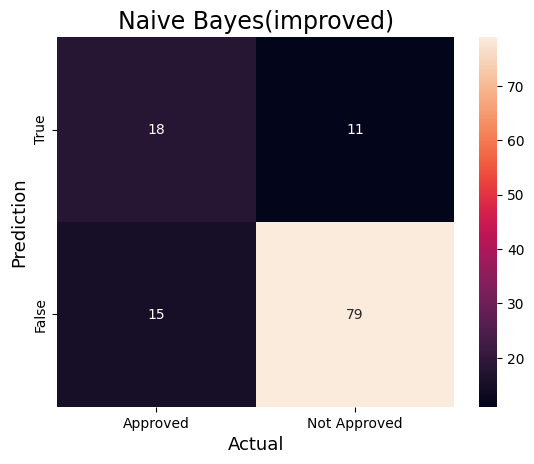

In [49]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Naive Bayes(improved)',fontsize=17)
plt.show()

**LOGISTIC** **REGRESSION**

In [50]:
lr=LogisticRegression(max_iter=500)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
print("The accuracy of Logistic Regression Classifier is: ",metrics.accuracy_score(y_pred,y_test))
# df1

The accuracy of Logistic Regression Classifier is:  0.8211382113821138


**ADABOOST**

In [51]:
adb = AdaBoostClassifier(estimator = LogisticRegression())
param ={'n_estimators':[150], 'learning_rate':[1.0]}
adb_model = adb.fit(x_train,y_train)
yp=adb_model.predict(x_test)
print(adb_model.score(x_test,y_test))
print("The accuracy of Logistic Regression Classifier is: ",metrics.accuracy_score(yp,y_test))

0.7967479674796748
The accuracy of Logistic Regression Classifier is:  0.7967479674796748


**GRIDSEARCHCV**

In [67]:
param_grid = [
    {'penalty' : ['l2','none'],
    'C' : np.logspace(-4, 4, 10),
    'solver' : ['sag'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
# gcv = GridSearchCV(adb_model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
gs = GridSearchCV(adb, param, cv=10,scoring='f1').fit(x_train, y_train)
gs.fit(x_train,y_train)
print("The best hyperparameters are ",gs.best_params_)
adb.set_params(**gs.best_params_)

adb.fit(x_train,y_train)
# print(adb.score(x_train,y_train))
best_gs = gs.fit(x_train,y_train)
# print(best_gs.best_estimator_)
print(best_gs.score(x_train,y_train))
print(best_gs.score(x_test,y_test))
model=best_gs
x.append('Logistic')
ls.append(best_gs.score(x_test,y_test))
# yp=model.predict(x_train)
# print(x_train[2],yp[2])

The best hyperparameters are  {'learning_rate': 1.0, 'n_estimators': 150}
0.8616600790513834
0.8944723618090452
[ 4.52000000e+02  1.00000000e+00  1.00000000e+00  0.00000000e+00
 -5.31021971e-01  1.00000000e+00  3.04741940e-01  3.60000000e+02
  0.00000000e+00  0.00000000e+00  5.68100000e+03] 0


[[15  4]
 [18 86]]


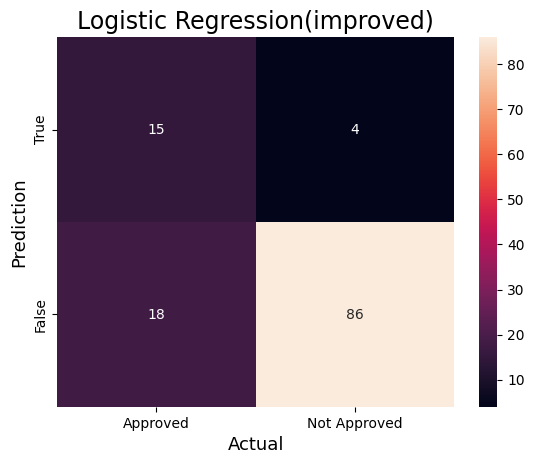

In [53]:
cm=confusion_matrix(y_pred,y_test)
print(cm)
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Approved','Not Approved'],
            yticklabels=['True','False'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Logistic Regression(improved)',fontsize=17)
plt.show()

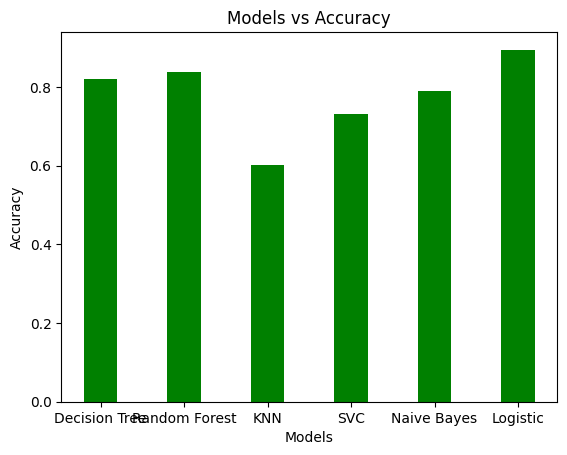

In [54]:
plt.bar(x, ls, color ='green',
        width = 0.4)

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Models vs Accuracy")
plt.show()


**TESTING DATASET**

In [55]:
test=pd.read_csv('Test.csv')
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [56]:
test['TotalIncome']=df['ApplicantIncome']+df['CoapplicantIncome']
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,5849.0
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,6091.0
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,3000.0
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,4941.0
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,7083.0
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,6046.0
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,6822.0
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,6216.0


In [57]:
for feat in test:
  le=LabelEncoder()
  if test[feat].dtype=='object':
    test[feat]=le.fit_transform(test[feat])

In [58]:
# x = df.iloc[:,np.r_[1:5,9:11,13]].values #independent variables
# y = df.iloc[:,12].values # dependent variables
# print(x)
# print(x[4])
# print(type(x))
yt=df['Loan_Status'].values
# y
xt=df.drop(labels=['Loan_Status','ApplicantIncome','CoapplicantIncome','Loan_ID'],axis=1).values
print(xt[0])
xt[:,[5,7]]=xt[:,[7,5]]
xt[:,[6,8]]=xt[:,[8,6]]
xt[0]

[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46412162e+02 3.60000000e+02 1.00000000e+00
 2.00000000e+00 5.84900000e+03]


array([1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.00000000e+00, 2.00000000e+00, 1.46412162e+02,
       3.60000000e+02, 5.84900000e+03])

In [59]:
yt=Labelencoder_y.fit_transform(yt)

In [60]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
xt[:,7:10]=ss.fit_transform(xt[:,7:10])
# xt[:,9]=ss.fit_transform(xt[:,9])
adb.fit(xt,yt)
best_gs = gs.fit(xt,yt)
best_gs.best_estimator_
print(best_gs.score(xt,yt))
# print(best_gs.score(x_test,y_test))

0.8764519535374867


In [61]:
xt[0]

array([ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        1.        ,  2.        ,  0.        ,  0.2732313 , -0.18218376])

In [62]:
print(test)
tst=test.drop(labels=['ApplicantIncome','CoapplicantIncome'],axis=1).values
print(tst)
X_train,X_test,Y_train,Y_test=train_test_split(xt,yt,test_size=0.2,random_state=0)

     Loan_ID  Gender  Married  Dependents  Education  Self_Employed   
0          0       1        1           0          0              0  \
1          1       1        1           1          0              0   
2          2       1        1           2          0              0   
3          3       1        1           2          0              0   
4          4       1        0           0          1              0   
..       ...     ...      ...         ...        ...            ...   
362      362       1        1           3          1              1   
363      363       1        1           0          0              0   
364      364       1        0           0          0              0   
365      365       1        1           0          0              0   
366      366       1        0           0          0              1   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term   
0               5720                  0       110.0             360.0  \
1

In [63]:
best_gs = gs.fit(X_train,Y_train)
print(best_gs.score(X_train,Y_train))
print(best_gs.score(X_test,Y_test))

0.872
0.8934010152284264


**WEBSITE**

In [64]:
import pickle
pickle.dump(model,open('model.pkl','wb'))